In [27]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [28]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [30]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
result = session.query(Measurement.tobs).\
    filter(extract("month",Measurement.date) == 6 ).all()

In [31]:
#  3. Convert the June temperatures to a list.
june_temp = list(np.ravel(result))


In [32]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temp)

In [33]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,0
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


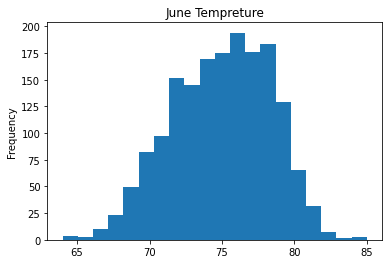

In [47]:
# Generate histogram plot for June tempreture
june_df.plot.hist(bins= 20, title= "June Tempreture", legend= False).get_figure().savefig('June_temp.jpg')

## D2: Determine the Summary Statistics for December

In [34]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
result = session.query(Measurement.tobs).\
    filter(extract("month",Measurement.date) == 12 ).all()

In [35]:
# 7. Convert the December temperatures to a list.
dec_temp = list(np.ravel(result))

In [36]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temp)

In [37]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,0
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


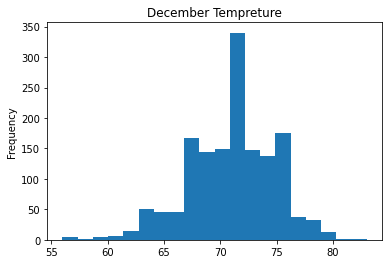

In [48]:
# Generate histogram plot for December tempreture
dec_df.plot.hist(bins= 20,title= "December Tempreture", legend= False).get_figure().savefig('Dec_temp.jpg')